In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from synple import syn

In [2]:
params = {'font.size': 16,
          'figure.figsize': (18.,8.),
          'axes.labelsize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16
         }
plt.rcParams.update(params)

# 656 517 589 486 467 nm
palette = ['#ff0000', '#28ff00', '#ffe200', '#00efff', '#009cff']
ymin_default = -0.034585833238544625
ymax_default = 1.0487448065063139

H = 6562.8
Mg1 = 5167.321
Mg2 = 5172.684
Mg3 = 5183.604
Na1 = 5889.939
Na2 = 5895.931
H_beta = 4861.3
Fe = 4668.134

# Teff wzdłuż ciągu głównego (logg 4.5) - kilka modeli o masach np.  0.5, 0.8, 1, 2, 5, 10, 20 Msun (ok. 3750, 5000, 6000, 7000, 17000, 22000, 30000 K)

# Teff 3750 K

In [3]:
s = syn('main_sequence/Teff3750.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff3750.dat is a kurucz  model
teff,logg,vmicro= 3750.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  96.3904287815094 seconds


(array([4400.00016, 4400.01796, 4400.03576, ..., 6799.95324, 6799.98024,
        6800.00024]),
 array([36682.7, 37079.3, 37314.2, ..., 65479. , 60573.4, 57104. ]),
 array([45670.        , 45670.43924214, 45670.87848429, ...,
        79185.84209041, 79185.93280443, 79186.        ]),
 [array([4400.178, 4400.205, 4400.219, ..., 6799.989, 6799.998, 6799.999]),
  array(['GdII', 'WI', 'NiI', ..., 'VO', 'VO', 'VO'], dtype='<U4'),
  array([0.3, 0.3, 1.9, ..., 0. , 0. , 0. ])])

In [4]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.178,Gd,II,0.3,.
1,4400.205,W,I,0.3,.
2,4400.219,Ni,I,1.9,*
3,4400.233,Zr,I,36.6,**
4,4400.242,Ca,I,4.2,*
...,...,...,...,...,...
114990,6799.602,Yb,I,3.8,*
114991,6799.628,Ti,II,0.0,0
114992,6799.677,Ti,I,0.1,0
114993,6799.697,Sc,I,0.1,0


In [5]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
3,4400.233,Zr,I,36.6,**
11,4400.383,Sc,II,16.2,**
12,4400.387,Sc,II,17.6,**
31,4400.560,V,I,17.8,**
32,4400.566,V,I,21.9,**
...,...,...,...,...,...
114886,6793.702,Y,I,22.1,**
114887,6793.705,Y,I,36.6,**
114917,6796.123,Fe,I,26.3,**
114943,6796.441,Cr,I,16.0,**


In [6]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [7]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

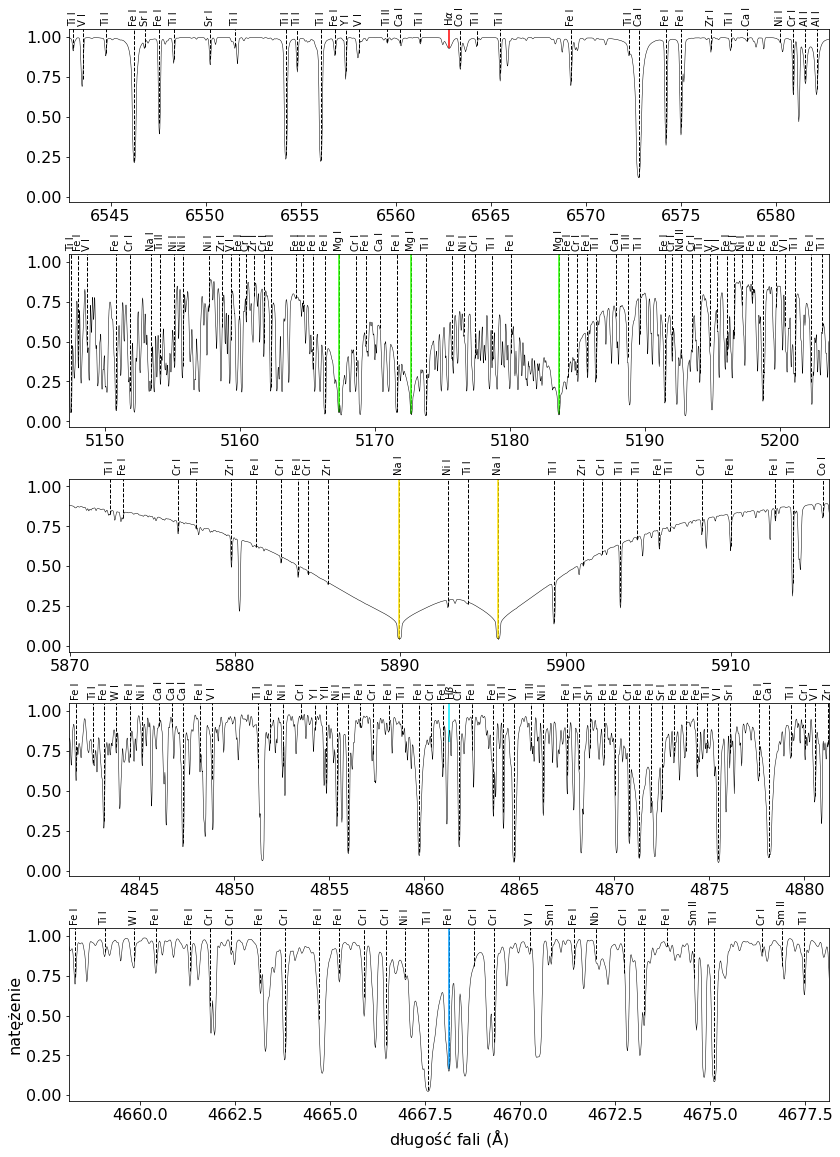

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff3750.pdf', bbox_inches='tight')

# Teff 5000 K

In [9]:
s = syn('main_sequence/Teff5000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff5000.dat is a kurucz  model
teff,logg,vmicro= 5000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  57.37656259536743 seconds


(array([4400.00016, 4400.01632, 4400.03249, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([284357., 310665., 332936., ..., 306424., 306610., 306621.]),
 array([403788.        , 403787.98379137, 403787.96757272, ...,
        309641.04816976, 309639.64156499, 309639.        ]),
 [array([4400.097, 4400.178, 4400.205, ..., 6799.928, 6799.934, 6799.963]),
  array(['NbII', 'GdII', 'WI', ..., 'CaH', 'CN', 'CN'], dtype='<U4'),
  array([0. , 0.2, 0.2, ..., 0. , 0.9, 0.2])])

In [10]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.097,Nb,II,0.0,0
1,4400.178,Gd,II,0.2,.
2,4400.205,W,I,0.2,.
3,4400.219,Ni,I,6.2,*
4,4400.233,Zr,I,4.9,*
...,...,...,...,...,...
130382,6799.651,Fe,II,0.0,0
130383,6799.677,Ti,I,0.0,0
130384,6799.697,Sc,I,0.0,0
130385,6799.764,Ti,I,0.0,0


In [11]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
13,4400.383,Sc,II,25.8,**
14,4400.387,Sc,II,13.9,**
34,4400.560,V,I,12.2,**
35,4400.566,V,I,17.2,**
36,4400.570,V,I,16.3,**
...,...,...,...,...,...
130292,6796.045,Fe,I,34.5,**
130293,6796.123,Fe,I,52.7,**
130310,6796.441,Cr,I,17.7,**
130345,6798.479,Ca,I,47.6,**


In [12]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [13]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

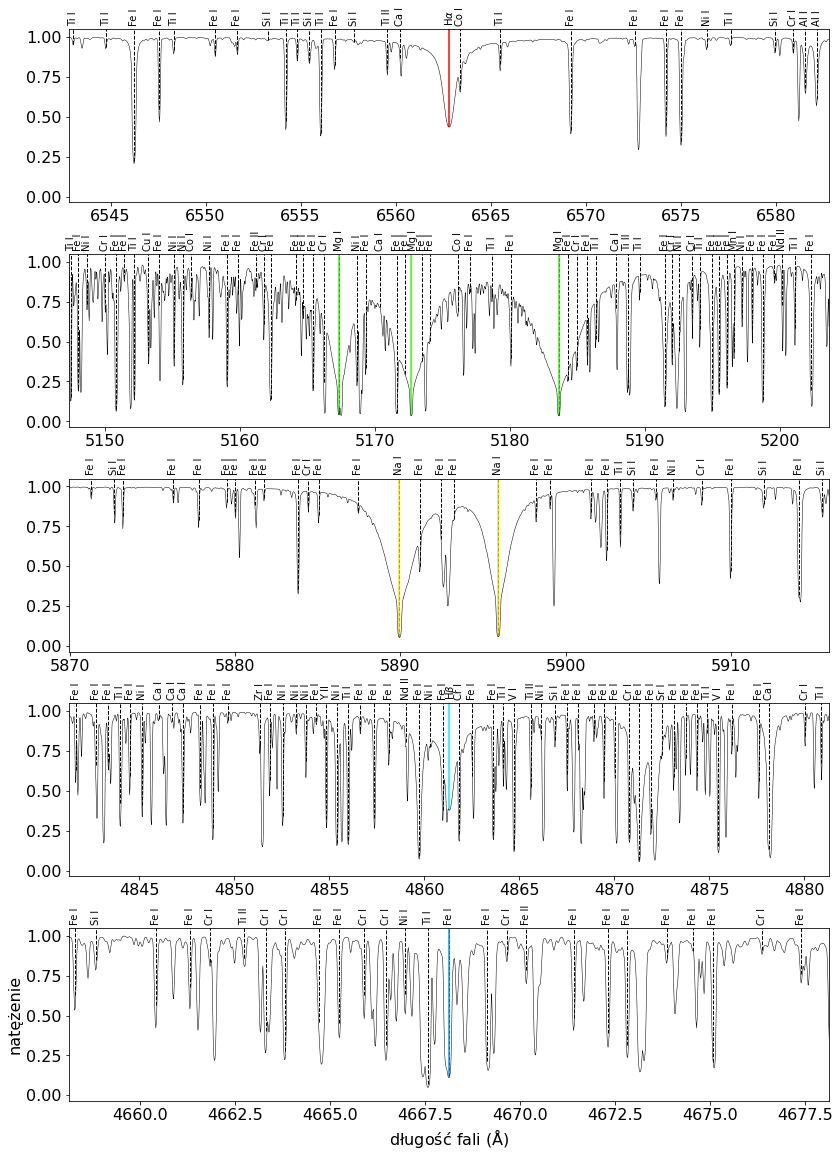

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg2+0.1, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff5000.pdf', bbox_inches='tight')

# Teff 6000 K

In [15]:
s = syn('main_sequence/Teff6000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff6000.dat is a kurucz  model
teff,logg,vmicro= 6000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  46.9915030002594 seconds


(array([4400.00016, 4400.01632, 4400.03249, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([ 951151.,  993822., 1027140., ...,  636011.,  636129.,  636162.]),
 array([1100610.        , 1100606.97795276, 1100603.95403543, ...,
         638199.47922229,  638195.02953986,  638193.        ]),
 [array([4400.097, 4400.178, 4400.205, ..., 6799.915, 6799.934, 6799.963]),
  array(['NbII', 'GdII', 'WI', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0. , 0.3, 0.1, ..., 0. , 0.2, 0.1])])

In [16]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.097,Nb,II,0.0,0
1,4400.178,Gd,II,0.3,.
2,4400.205,W,I,0.1,0
3,4400.219,Ni,I,5.7,*
4,4400.233,Zr,I,0.8,.
...,...,...,...,...,...
113135,6799.651,Fe,II,0.0,0
113136,6799.677,Ti,I,0.0,0
113137,6799.697,Sc,I,0.0,0
113138,6799.764,Ti,I,0.0,0


In [17]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
13,4400.383,Sc,II,34.5,**
14,4400.387,Sc,II,16.8,**
34,4400.560,V,I,12.9,**
35,4400.566,V,I,18.1,**
36,4400.570,V,I,17.2,**
...,...,...,...,...,...
113064,6796.123,Fe,I,44.7,**
113066,6796.369,Si,I,10.0,**
113068,6796.441,Cr,I,14.3,**
113096,6798.479,Ca,I,22.1,**


In [18]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [19]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

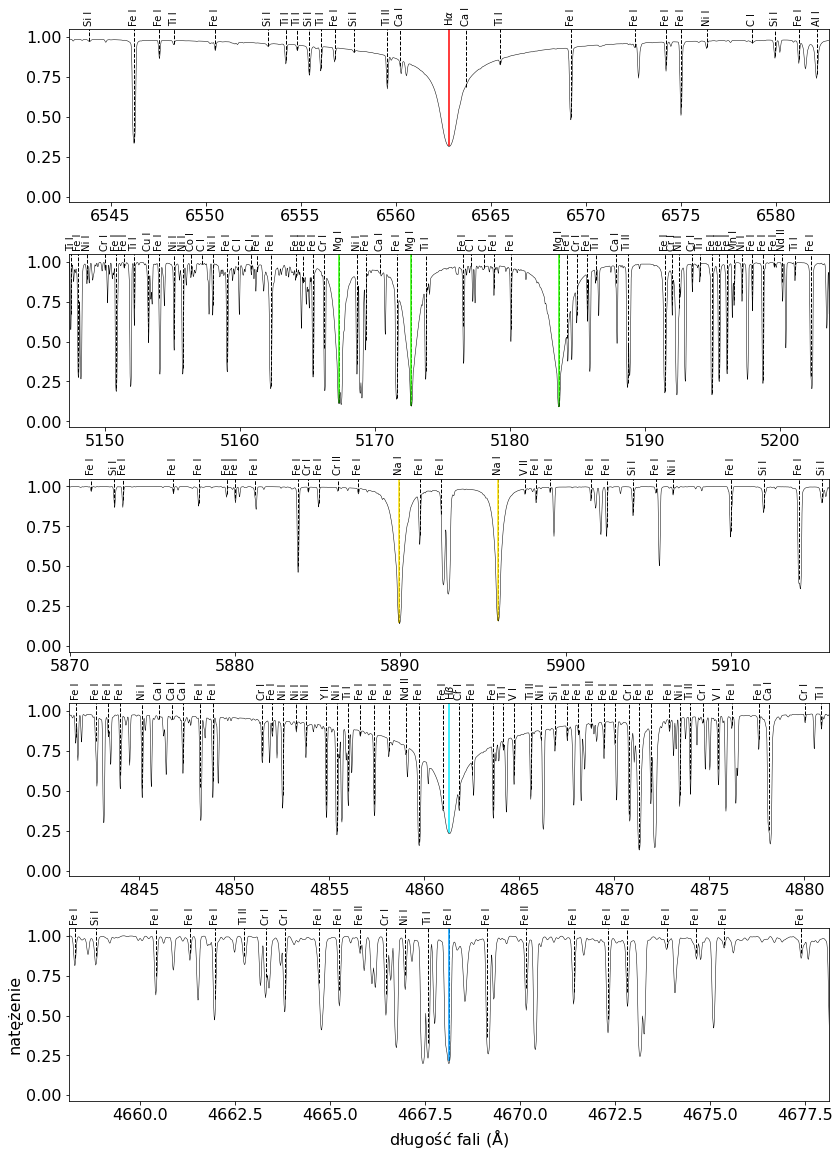

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6000.pdf', bbox_inches='tight')

# Teff 7000 K

In [21]:
s = syn('main_sequence/Teff7000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff7000.dat is a kurucz  model
teff,logg,vmicro= 7000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  39.42635226249695 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([2306960., 2316330., 2324320., ..., 1067630., 1067640., 1067640.]),
 array([2374750.        , 2374739.18532361, 2374728.37064722, ...,
        1069573.78503286, 1069564.31799873, 1069560.        ]),
 [array([4400.04 , 4400.097, 4400.178, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'NbII', 'GdII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0. , 0. , 0.2, ..., 0. , 0. , 0. ])])

In [22]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.0,0
1,4400.097,Nb,II,0.0,0
2,4400.178,Gd,II,0.2,.
3,4400.205,W,I,0.0,0
4,4400.219,Ni,I,3.1,*
...,...,...,...,...,...
92943,6799.651,Fe,II,0.1,0
92944,6799.677,Ti,I,0.0,0
92945,6799.697,Sc,I,0.0,0
92946,6799.764,Ti,I,0.0,0


In [23]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
13,4400.383,Sc,II,35.0,**
14,4400.387,Sc,II,17.1,**
31,4400.549,Fe,I,10.0,**
36,4400.573,V,I,11.2,**
72,4400.855,Ni,I,23.0,**
...,...,...,...,...,...
92875,6795.788,Si,I,63.1,**
92877,6796.045,Fe,I,12.2,**
92878,6796.123,Fe,I,45.9,**
92905,6798.479,Ca,I,11.5,**


In [24]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [25]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

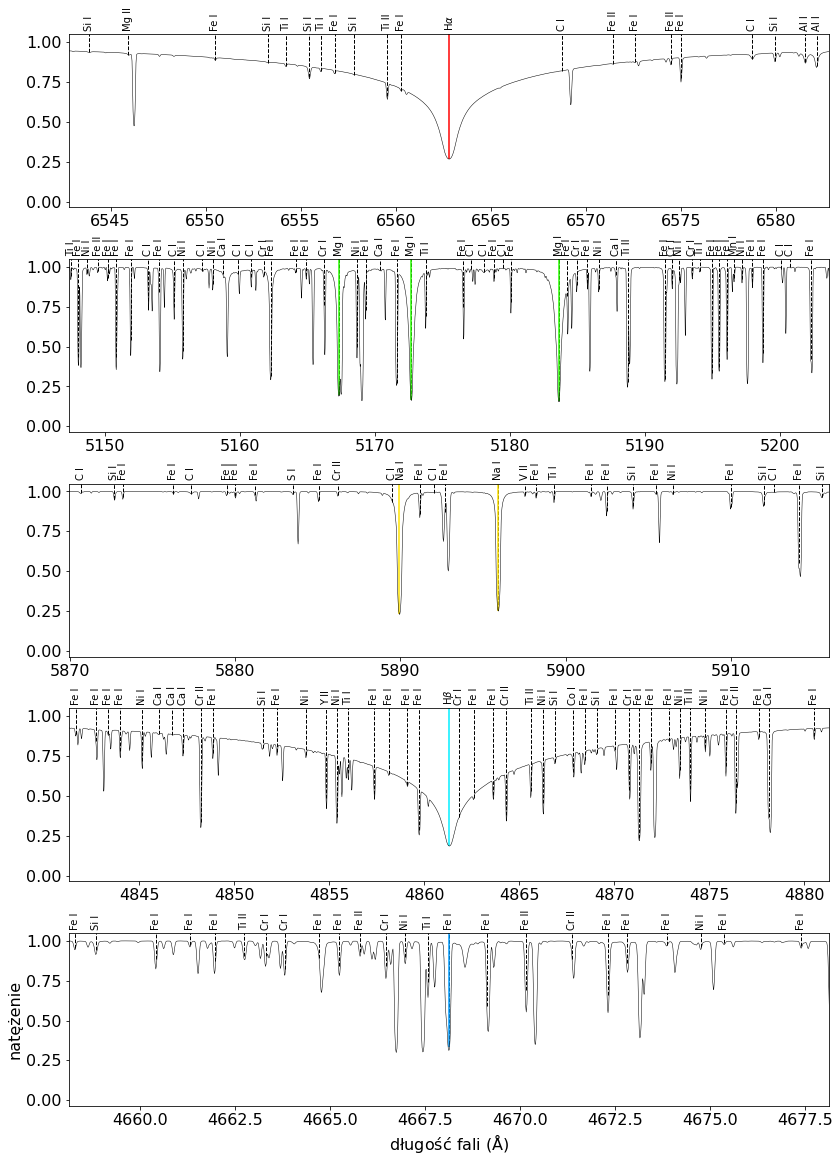

In [26]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1+0.1, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff7000.pdf', bbox_inches='tight')

# Teff 17000 K

In [27]:
s = syn('main_sequence/Teff17000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff17000.dat is a kurucz  model
teff,logg,vmicro= 17000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  24.77401041984558 seconds


(array([4400.00016, 4400.00316, 4400.00616, ..., 6799.93657, 6799.97024,
        6800.00024]),
 array([27390800., 27389500., 27387800., ...,  6274250.,  6273390.,
         6271140.]),
 array([27691300.        , 27691237.21491815, 27691174.42983632, ...,
         6275044.9993379 ,  6274936.59148951,  6274840.        ]),
 [array([4400.006, 4400.021, 4400.04 , ..., 6799.54 , 6799.651, 6799.768]),
  array(['NeII', 'NiII', 'CrII', ..., 'ZrII', 'FeII', 'FeII'], dtype='<U4'),
  array([0. , 0. , 0. , ..., 0. , 0.1, 0.4])])

In [28]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.006,Ne,II,0.0,0
1,4400.021,Ni,II,0.0,0
2,4400.040,Cr,II,0.0,0
3,4400.065,Cr,II,0.0,0
4,4400.095,Ar,II,12.1,**
...,...,...,...,...,...
34254,6799.170,N,II,0.0,0
34255,6799.290,Ar,II,0.0,0
34256,6799.540,Zr,II,0.0,0
34257,6799.651,Fe,II,0.1,.


In [29]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
4,4400.095,Ar,II,12.1,**
40,4400.986,Ar,II,38.0,**
76,4402.373,O,I,68.0,**
86,4402.765,O,I,83.3,**
88,4402.841,S,II,13.5,**
...,...,...,...,...,...
34079,6780.594,C,II,14.9,**
34107,6783.907,C,II,63.7,**
34142,6787.210,C,II,14.9,**
34152,6787.855,Mg,II,12.7,**


In [30]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [31]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

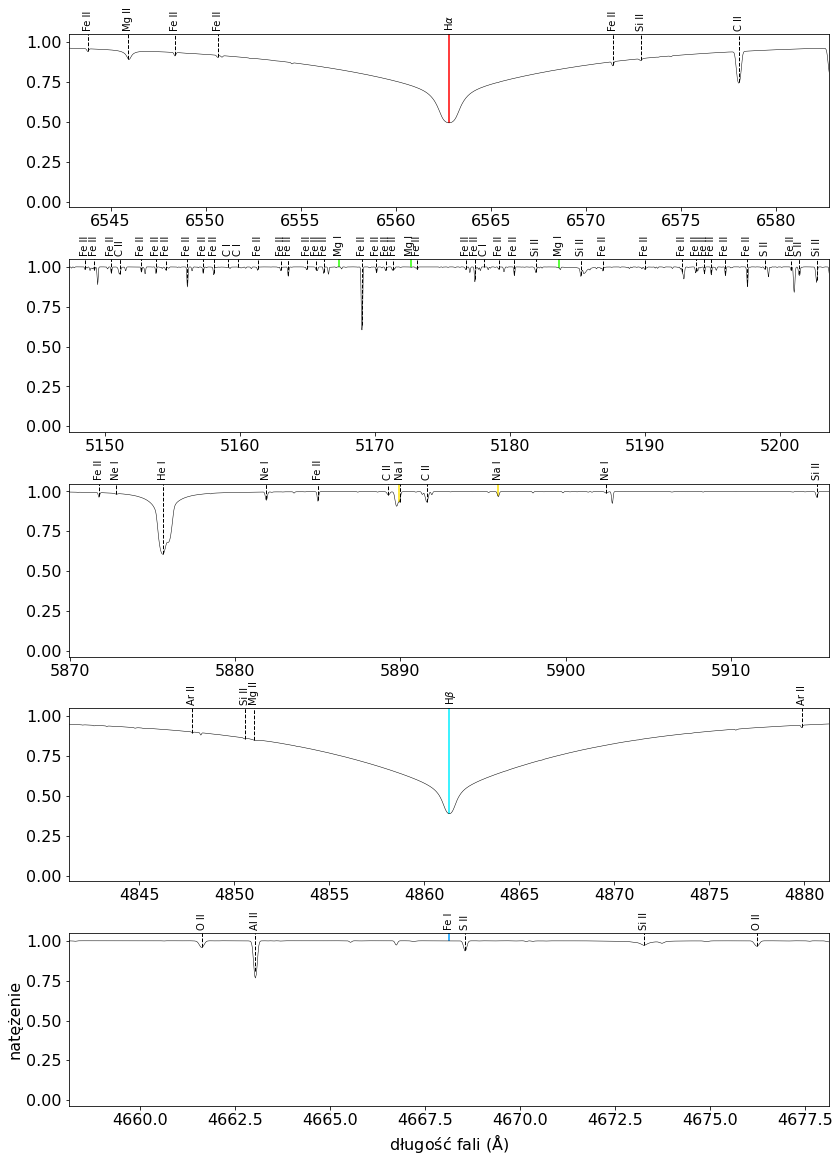

In [32]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
ax[1].text(Mg1, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg2-0.1, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg3, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].text(Na2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].text(Fe, 1.07, "Fe I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff17000.pdf', bbox_inches='tight')

# Teff 22000 K

In [33]:
s = syn('main_sequence/Teff22000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff22000.dat is a kurucz  model
teff,logg,vmicro= 22000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  23.408507347106934 seconds


(array([4400.00016, 4400.00316, 4400.00616, ..., 6799.93657, 6799.97024,
        6800.00024]),
 array([43512800., 43507100., 43500100., ...,  9259180.,  9258360.,
         9256640.]),
 array([43819100.        , 43818995.3923509 , 43818890.78470185, ...,
         9260125.34451707,  9259958.583878  ,  9259810.        ]),
 [array([4400.006, 4400.021, 4400.04 , ..., 6799.54 , 6799.651, 6799.768]),
  array(['NeII', 'NiII', 'CrII', ..., 'ZrII', 'FeII', 'FeII'], dtype='<U4'),
  array([0. , 0. , 0. , ..., 0. , 0. , 0.1])])

In [34]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.006,Ne,II,0.0,0
1,4400.021,Ni,II,0.0,0
2,4400.040,Cr,II,0.0,0
3,4400.065,Cr,II,0.0,0
4,4400.095,Ar,II,9.7,*
...,...,...,...,...,...
30384,6799.290,Ar,II,0.2,.
30385,6799.364,V,II,0.0,0
30386,6799.540,Zr,II,0.0,0
30387,6799.651,Fe,II,0.0,0


In [35]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
36,4400.986,Ar,II,26.5,**
62,4402.373,O,I,49.8,**
73,4402.765,O,I,47.8,**
89,4403.478,O,I,64.3,**
105,4403.830,Si,II,19.2,**
...,...,...,...,...,...
30233,6780.594,C,II,60.0,**
30258,6783.907,C,II,81.4,**
30290,6787.210,C,II,59.9,**
30325,6791.465,C,II,80.8,**


In [36]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [37]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

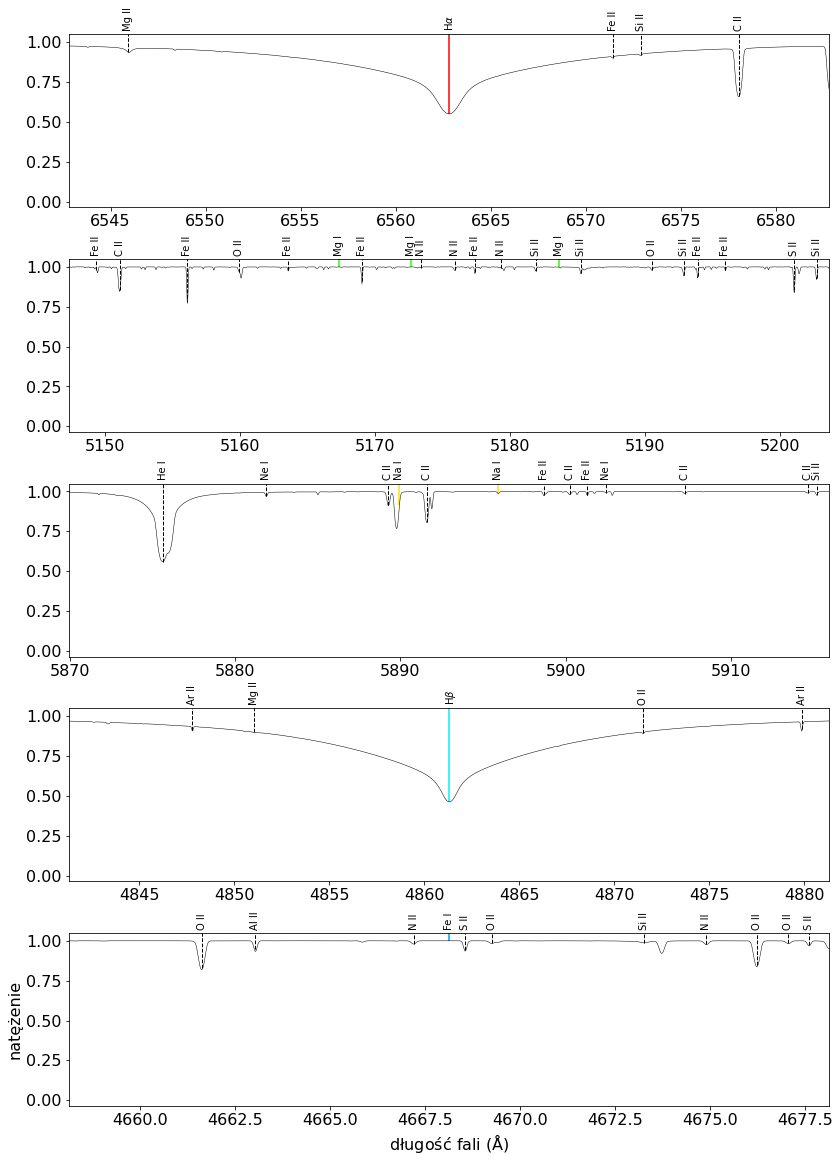

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
ax[1].text(Mg1, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg2, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg3, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].text(Na2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].text(Fe, 1.07, "Fe I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff22000.pdf', bbox_inches='tight')

# Teff 30000 K

In [39]:
s = syn('main_sequence/Teff30000.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

main_sequence/Teff30000.dat is a kurucz  model
teff,logg,vmicro= 30000.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  21.756974458694458 seconds


(array([4400.00016, 4400.00316, 4400.00616, ..., 6799.95761, 6799.99549,
        6800.00024]),
 array([79760700., 79758100., 79755500., ..., 15717700., 15717300.,
        15717200.]),
 array([80033600.        , 80033398.79040663, 80033197.58081333, ...,
        15718474.60456942, 15718141.73989455, 15718100.        ]),
 [array([4400.006, 4400.095, 4400.172, ..., 6799.54 , 6799.651, 6799.768]),
  array(['NeII', 'ArII', 'CII', ..., 'ZrII', 'FeII', 'FeII'], dtype='<U4'),
  array([2.4, 0.8, 0. , ..., 0.1, 0. , 0. ])])

In [40]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.006,Ne,II,2.4,*
1,4400.095,Ar,II,0.8,.
2,4400.172,C,II,0.0,0
3,4400.180,Ne,II,2.0,*
4,4400.297,Fe,II,0.0,0
...,...,...,...,...,...
21958,6799.290,Ar,II,0.0,0
21959,6799.364,V,II,0.0,0
21960,6799.540,Zr,II,0.1,0
21961,6799.651,Fe,II,0.0,0


In [41]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
66,4403.733,Si,IV,19.0,**
67,4403.733,Si,IV,26.3,**
68,4403.830,Si,II,23.4,**
87,4404.970,O,II,82.0,**
92,4405.352,Si,II,20.6,**
...,...,...,...,...,...
21869,6780.594,C,II,49.2,**
21890,6783.907,C,II,122.9,***
21907,6787.210,C,II,49.1,**
21924,6791.465,C,II,62.2,**


In [42]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [43]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 0.5):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

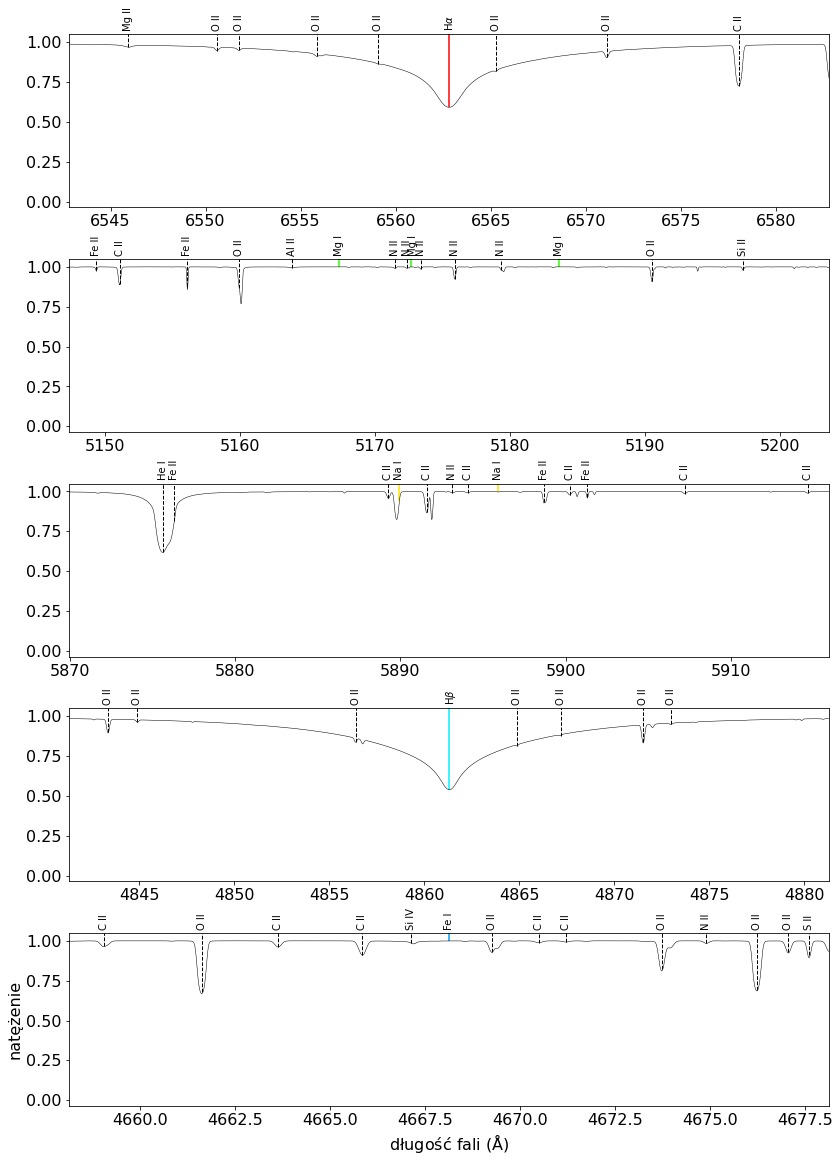

In [44]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
ax[1].text(Mg1, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg2+0.15, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg3, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].text(Na2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].text(Fe, 1.07, "Fe I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff30000.pdf', bbox_inches='tight')

# F   Teff 6500 - wszystkie klasy jasności

# Ib log(g)=0.5

In [45]:
s = syn('Teff6500_g05.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

Teff6500_g05.dat is a kurucz  model
teff,logg,vmicro= 6500.0 0.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  41.45841360092163 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([1678790., 1739030., 1805510., ...,  847957.,  847948.,  847933.]),
 array([2093730.        , 2093717.19792079, 2093704.39584158, ...,
         848143.34532234,  848135.55378822,  848132.        ]),
 [array([4400.04 , 4400.065, 4400.095, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'CrII', 'ArII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0.1, 0.1, 0. , ..., 0. , 0. , 0. ])])

In [46]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.1,.
1,4400.065,Cr,II,0.1,0
2,4400.095,Ar,II,0.0,0
3,4400.097,Nb,II,0.2,.
4,4400.178,Gd,II,3.8,*
...,...,...,...,...,...
118326,6799.651,Fe,II,1.6,*
118327,6799.677,Ti,I,0.0,0
118328,6799.697,Sc,I,0.0,0
118329,6799.764,Ti,I,0.0,0


In [47]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
17,4400.383,Sc,II,30.9,**
18,4400.387,Sc,II,15.6,**
34,4400.535,Ce,II,12.1,**
40,4400.573,V,I,17.0,**
76,4400.821,Nd,II,34.1,**
...,...,...,...,...,...
118248,6796.045,Fe,I,14.1,**
118250,6796.123,Fe,I,35.4,**
118286,6798.479,Ca,I,10.8,**
118299,6799.003,Mg,I,35.7,**


In [48]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [49]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 1.0):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

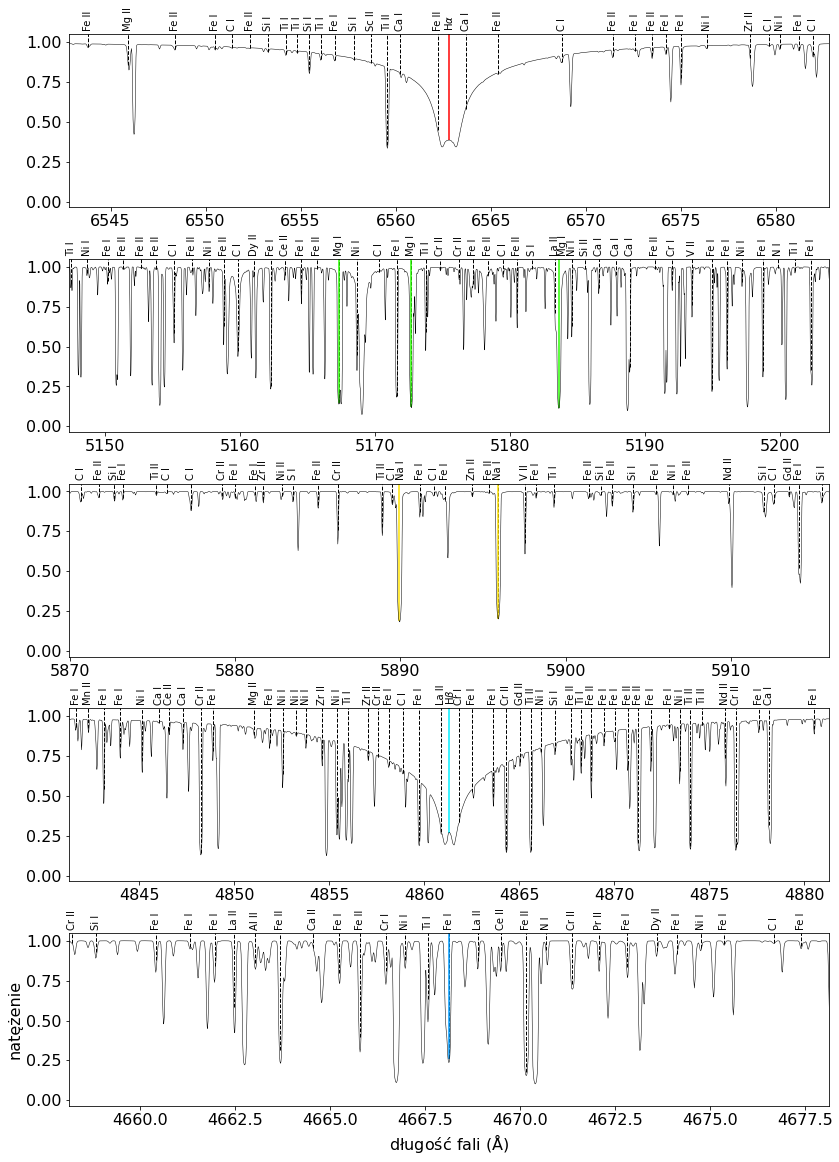

In [50]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg3+0.3, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1+0.1, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6500_g05.pdf', bbox_inches='tight')

# Ib log(g)=1

In [51]:
s = syn('Teff6500_g10.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

Teff6500_g10.dat is a kurucz  model
teff,logg,vmicro= 6500.0 1.0 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  39.83368110656738 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([1725660., 1767980., 1813200., ...,  853490.,  853489.,  853481.]),
 array([2029270.        , 2029258.38574257, 2029246.77148515, ...,
         853820.13117647,  853812.48670956,  853809.        ]),
 [array([4400.04 , 4400.065, 4400.097, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'CrII', 'NbII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0.1, 0. , 0.1, ..., 0. , 0. , 0. ])])

In [52]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.1,0
1,4400.065,Cr,II,0.0,0
2,4400.097,Nb,II,0.1,.
3,4400.178,Gd,II,3.2,*
4,4400.205,W,I,0.0,0
...,...,...,...,...,...
114805,6799.651,Fe,II,1.1,*
114806,6799.677,Ti,I,0.0,0
114807,6799.697,Sc,I,0.0,0
114808,6799.764,Ti,I,0.0,0


In [53]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
16,4400.383,Sc,II,17.6,**
17,4400.387,Sc,II,18.8,**
33,4400.535,Ce,II,10.4,**
34,4400.549,Fe,I,10.4,**
39,4400.573,V,I,20.0,**
...,...,...,...,...,...
114732,6796.123,Fe,I,40.3,**
114737,6796.441,Cr,I,10.6,**
114765,6798.479,Ca,I,12.8,**
114778,6799.003,Mg,I,42.6,**


In [54]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [55]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 1.0):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

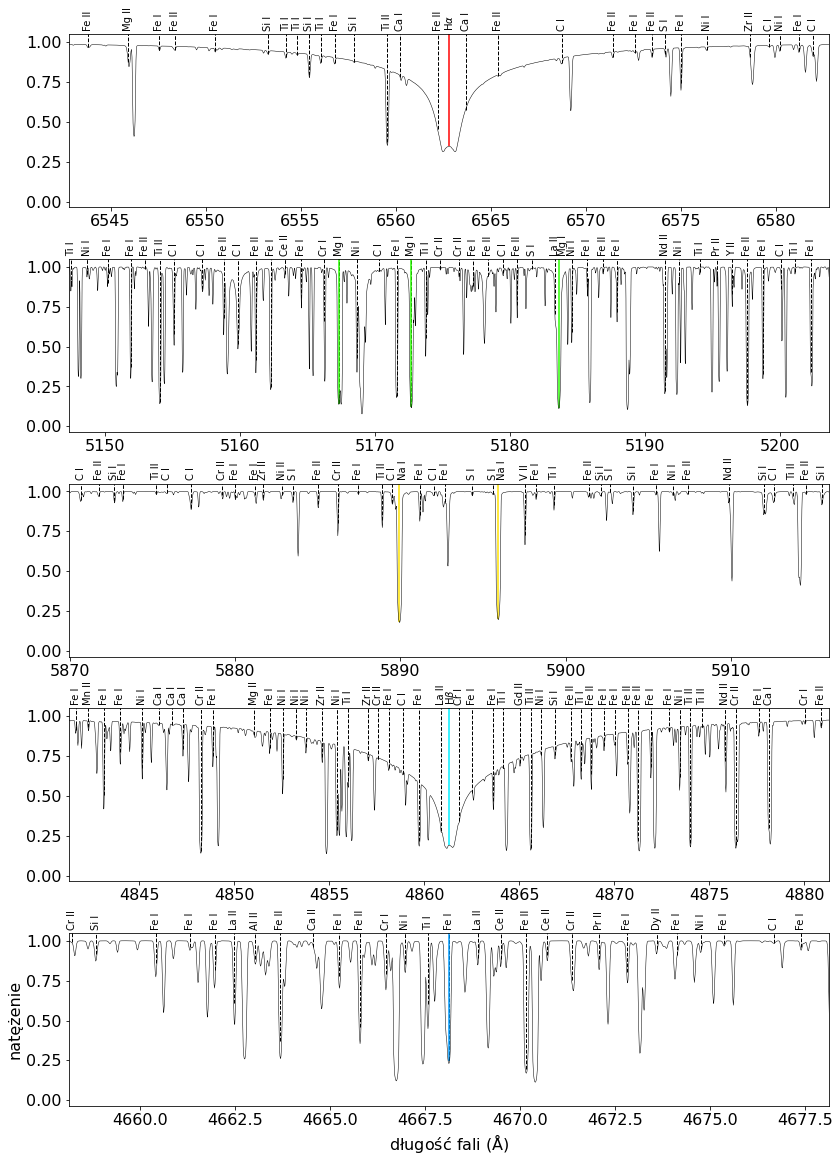

In [56]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].text(Mg3+0.3, 1.07, "Mg I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1+0.2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].text(Na2+0.2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6500_g10.pdf', bbox_inches='tight')

# Ib log(g)=2

In [57]:
s = syn('Teff6500_g20.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

Teff6500_g20.dat is a kurucz  model
teff,logg,vmicro= 6500.0 2.0 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  38.45455527305603 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([1745810., 1765010., 1784010., ...,  856010.,  856026.,  856027.]),
 array([1888720.        , 1888711.02534653, 1888702.05069307, ...,
         856757.76410811,  856750.37172973,  856747.        ]),
 [array([4400.04 , 4400.065, 4400.097, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'CrII', 'NbII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0.1, 0. , 0.1, ..., 0. , 0. , 0. ])])

In [58]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.1,0
1,4400.065,Cr,II,0.0,0
2,4400.097,Nb,II,0.1,0
3,4400.178,Gd,II,1.9,*
4,4400.205,W,I,0.0,0
...,...,...,...,...,...
113289,6799.651,Fe,II,0.3,.
113290,6799.677,Ti,I,0.0,0
113291,6799.697,Sc,I,0.0,0
113292,6799.764,Ti,I,0.0,0


In [59]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
15,4400.383,Sc,II,34.6,**
16,4400.387,Sc,II,16.8,**
34,4400.549,Fe,I,11.7,**
36,4400.566,V,I,10.5,**
37,4400.570,V,I,10.0,**
...,...,...,...,...,...
113221,6796.369,Si,I,10.2,**
113223,6796.441,Cr,I,11.8,**
113250,6798.479,Ca,I,15.3,**
113262,6799.003,Mg,I,48.4,**


In [60]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [61]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 1.0):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

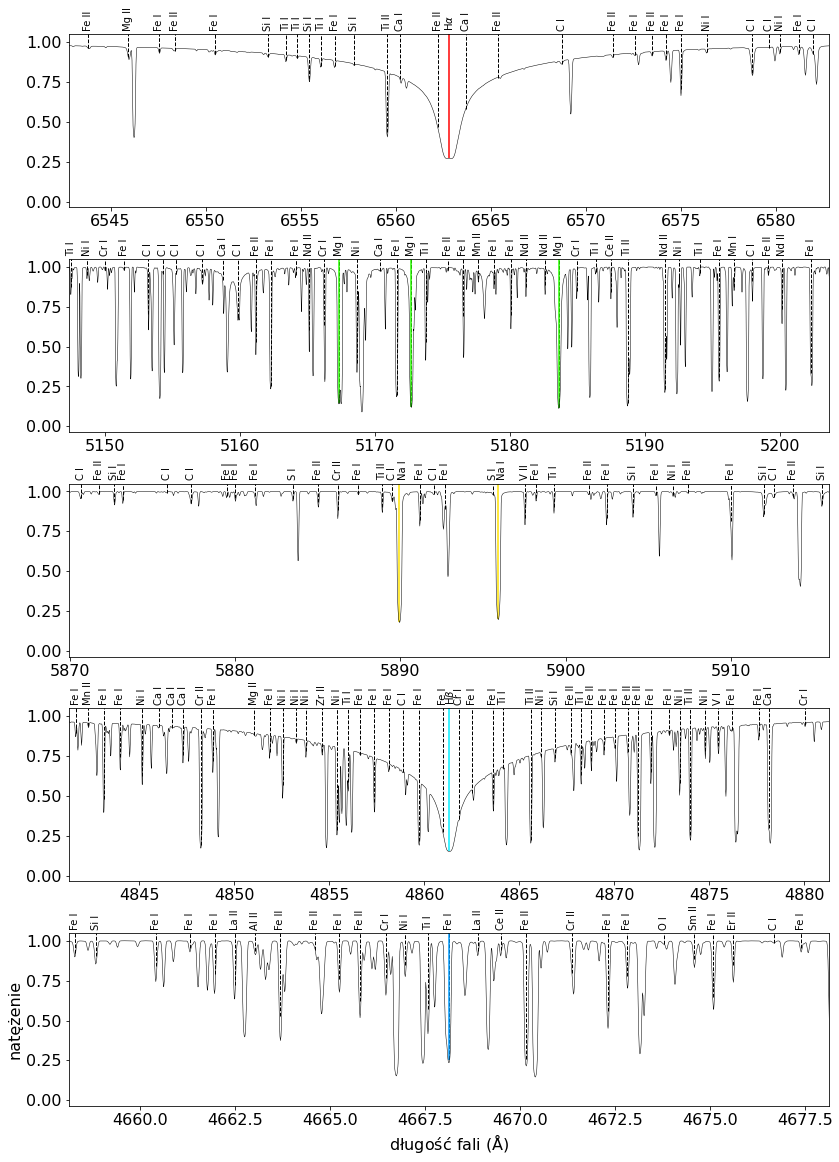

In [62]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1+0.2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].text(Na2+0.2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6500_g20.pdf', bbox_inches='tight')

# Ib log(g)=3

In [63]:
s = syn('Teff6500_g30.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

Teff6500_g30.dat is a kurucz  model
teff,logg,vmicro= 6500.0 3.0 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  35.31236433982849 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([1688260., 1702020., 1714210., ...,  849070.,  849103.,  849112.]),
 array([1773230.        , 1773222.48834766, 1773214.97669532, ...,
         850292.30030742,  850285.22644964,  850282.        ]),
 [array([4400.04 , 4400.065, 4400.097, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'CrII', 'NbII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0., 0., 0., ..., 0., 0., 0.])])

In [64]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.0,0
1,4400.065,Cr,II,0.0,0
2,4400.097,Nb,II,0.0,0
3,4400.178,Gd,II,0.9,.
4,4400.205,W,I,0.0,0
...,...,...,...,...,...
108347,6799.651,Fe,II,0.1,.
108348,6799.677,Ti,I,0.0,0
108349,6799.697,Sc,I,0.0,0
108350,6799.764,Ti,I,0.0,0


In [65]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
15,4400.383,Sc,II,29.9,**
16,4400.387,Sc,II,15.4,**
33,4400.549,Fe,I,10.3,**
35,4400.566,V,I,10.9,**
36,4400.570,V,I,10.5,**
...,...,...,...,...,...
108277,6796.123,Fe,I,39.3,**
108279,6796.369,Si,I,10.5,**
108281,6796.441,Cr,I,12.3,**
108308,6798.479,Ca,I,16.6,**


In [66]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [67]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 1.0):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

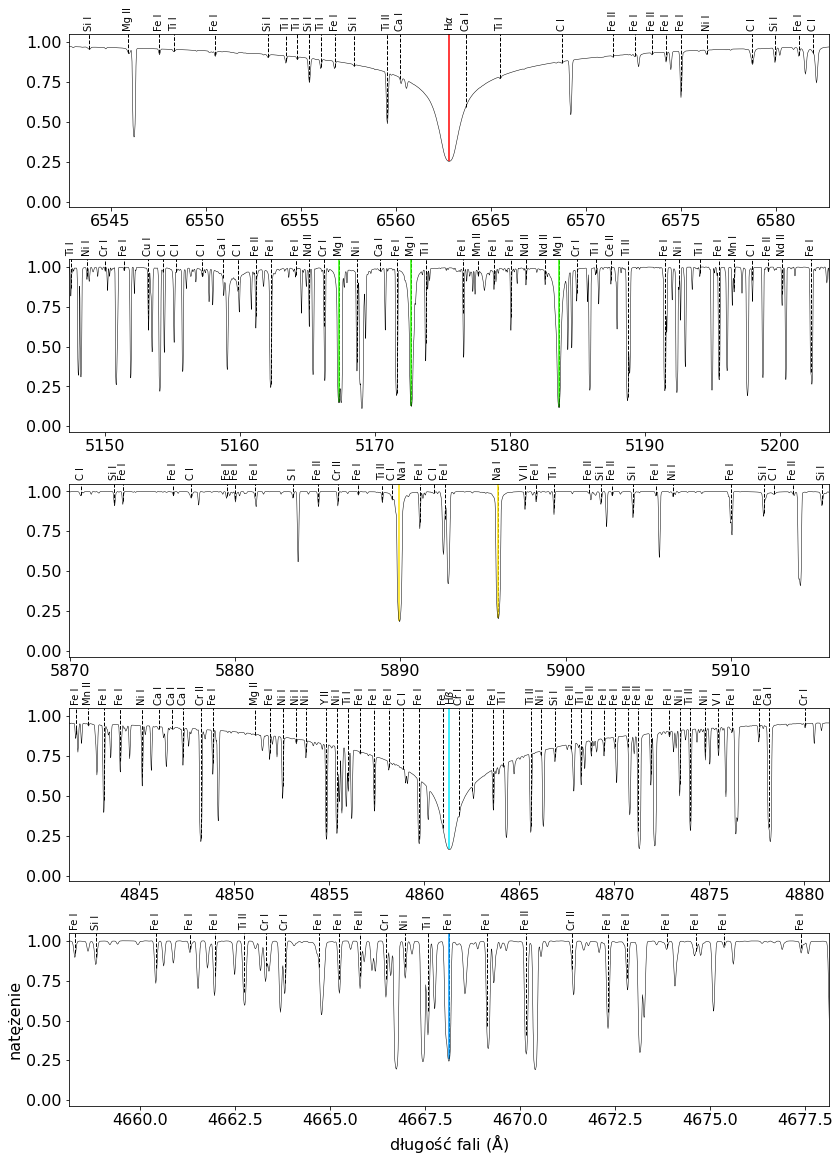

In [68]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
ax[2].text(Na1+0.2, 1.07, "Na I", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6500_g30.pdf', bbox_inches='tight')

# Ib log(g)=4.5

In [69]:
s = syn('Teff6500_g45.dat', (4400.,6800.), lineid=True, save=True, synfile='widmo.txt', clean=False, tmpdir='FORTpliki')
s

Teff6500_g45.dat is a kurucz  model
teff,logg,vmicro= 6500.0 4.5 2.0
cannot create tmpdir FORTpliki 
syn ellapsed time  42.27716255187988 seconds


(array([4400.00016, 4400.01349, 4400.02682, ..., 6799.9596 , 6799.98751,
        6800.00024]),
 array([1545710., 1567240., 1585580., ...,  837973.,  838013.,  838025.]),
 array([1643240.        , 1643234.32497635, 1643228.6499527 , ...,
         839789.6951634 ,  839783.03689542,  839780.        ]),
 [array([4400.04 , 4400.097, 4400.178, ..., 6799.915, 6799.934, 6799.963]),
  array(['CrII', 'NbII', 'GdII', ..., 'CN', 'CN', 'CN'], dtype='<U4'),
  array([0. , 0. , 0.3, ..., 0. , 0. , 0. ])])

In [70]:
lines = pd.read_csv('FORTpliki/fort.12', comment='#', sep="\s+", header=None, usecols=(0,1,2,6,7))
lines

,0,1,2,6,7
0,4400.040,Cr,II,0.0,0
1,4400.097,Nb,II,0.0,0
2,4400.178,Gd,II,0.3,.
3,4400.205,W,I,0.0,0
4,4400.219,Ni,I,4.7,*
...,...,...,...,...,...
102220,6799.651,Fe,II,0.0,0
102221,6799.677,Ti,I,0.0,0
102222,6799.697,Sc,I,0.0,0
102223,6799.764,Ti,I,0.0,0


In [71]:
strong_lines = lines[(lines[7] == "**") | (lines[7] == "***")]
strong_lines

,0,1,2,6,7
13,4400.383,Sc,II,32.8,**
14,4400.387,Sc,II,16.4,**
31,4400.549,Fe,I,12.1,**
33,4400.566,V,I,10.9,**
34,4400.570,V,I,10.4,**
...,...,...,...,...,...
102151,6796.045,Fe,I,17.6,**
102152,6796.123,Fe,I,38.2,**
102156,6796.441,Cr,I,12.1,**
102181,6798.479,Ca,I,16.7,**


In [72]:
strong_lines1 = strong_lines[(strong_lines[0] > H-20) & (strong_lines[0] < H+20)]
strong_lines2 = strong_lines[(strong_lines[0] > Mg1-20) & (strong_lines[0] < Mg3+20)]
strong_lines3 = strong_lines[(strong_lines[0] > Na1-20) & (strong_lines[0] < Na2+20)]
strong_lines4 = strong_lines[(strong_lines[0] > H_beta-20) & (strong_lines[0] < H_beta+20)]
strong_lines5 = strong_lines[(strong_lines[0] > Fe-10) & (strong_lines[0] < Fe+10)]

In [73]:
labels1 = strong_lines1.copy()
idx = strong_lines1.index[0]
for i in strong_lines1.index[1:]:
    if (strong_lines1[1][idx] == strong_lines1[1][i] and strong_lines1[0][i] - strong_lines1[0][idx] < 0.2) or (strong_lines1[0][i] - strong_lines1[0][idx] < 0.5):
        labels1 = labels1.drop(i)
    else:
        idx = i

labels2 = strong_lines2.copy()
idx = strong_lines2.index[0]
for i in strong_lines2.index[1:]:
    if (strong_lines2[1][idx] == strong_lines2[1][i] and strong_lines2[0][i] - strong_lines2[0][idx] < 0.2) or (strong_lines2[0][i] - strong_lines2[0][idx] < 1.0):
        labels2 = labels2.drop(i)
    else:
        idx = i

labels3 = strong_lines3.copy()
idx = strong_lines3.index[0]
for i in strong_lines3.index[1:]:
    if (strong_lines3[1][idx] == strong_lines3[1][i] and strong_lines3[0][i] - strong_lines3[0][idx] < 0.2) or (strong_lines3[0][i] - strong_lines3[0][idx] < 0.5):
        labels3 = labels3.drop(i)
    else:
        idx = i

labels4 = strong_lines4.copy()
idx = strong_lines4.index[0]
for i in strong_lines4.index[1:]:
    if (strong_lines4[1][idx] == strong_lines4[1][i] and strong_lines4[0][i] - strong_lines4[0][idx] < 0.2) or (strong_lines4[0][i] - strong_lines4[0][idx] < 0.5):
        labels4 = labels4.drop(i)
    else:
        idx = i

labels5 = strong_lines5.copy()
idx = strong_lines5.index[0]
for i in strong_lines5.index[1:]:
    if (strong_lines5[1][idx] == strong_lines5[1][i] and strong_lines5[0][i] - strong_lines5[0][idx] < 0.2) or (strong_lines5[0][i] - strong_lines5[0][idx] < 0.5):
        labels5 = labels5.drop(i)
    else:
        idx = i

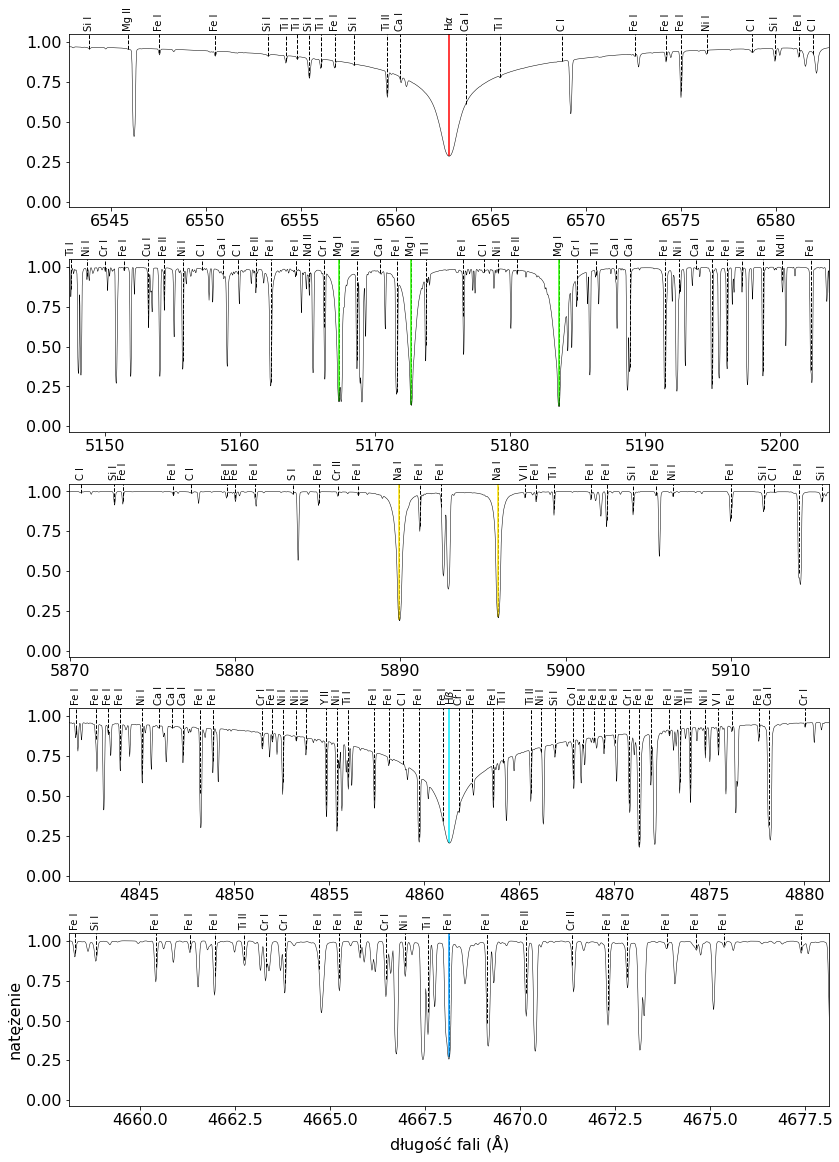

In [74]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,16))
plt.subplots_adjust(left=0.08, right=0.96, bottom=0.05, top=0.98)

ax[0].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels1.index:
    idx = np.where((s[0] > labels1[0][i]-0.05) & (s[0] < labels1[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[0].vlines(labels1[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[0].text(labels1[0][i], 1.07, f"{labels1[1][i]} {labels1[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H-0.05) & (s[0] < H+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[0].vlines(H, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[0], label=r"H$\alpha$")
ax[0].text(H, 1.07, r"H$\alpha$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[0].set_xlim(H-20, H+20)

ax[1].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels2.index:
    idx = np.where((s[0] > labels2[0][i]-0.05) & (s[0] < labels2[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[1].vlines(labels2[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[1].text(labels2[0][i], 1.07, f"{labels2[1][i]} {labels2[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Mg1-0.05) & (s[0] < Mg1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1], label="Mg I")
idx = np.where((s[0] > Mg2-0.05) & (s[0] < Mg2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
idx = np.where((s[0] > Mg3-0.05) & (s[0] < Mg3+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[1].vlines(Mg3, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[1])
ax[1].set_xlim(Mg1-20, Mg3+20)

ax[2].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels3.index:
    idx = np.where((s[0] > labels3[0][i]-0.05) & (s[0] < labels3[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[2].vlines(labels3[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[2].text(labels3[0][i], 1.07, f"{labels3[1][i]} {labels3[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Na1-0.05) & (s[0] < Na1+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na1, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2], label="Na I")
idx = np.where((s[0] > Na2-0.05) & (s[0] < Na2+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[2].vlines(Na2, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[2])
ax[2].set_xlim(Na1-20, Na2+20)

ax[3].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels4.index:
    idx = np.where((s[0] > labels4[0][i]-0.05) & (s[0] < labels4[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[3].vlines(labels4[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[3].text(labels4[0][i], 1.07, f"{labels4[1][i]} {labels4[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > H_beta-0.05) & (s[0] < H_beta+0.05))
ymin = np.mean(s[1][idx]/s[2][idx])
ax[3].vlines(H_beta, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[3], label=r"H$\beta$")
ax[3].text(H_beta+0.12, 1.07, r"H$\beta$", rotation=90, fontsize=10, verticalalignment='bottom', horizontalalignment='center')
ax[3].set_xlim(H_beta-20, H_beta+20)

ax[4].plot(s[0],s[1]/s[2], lw=0.5, c='k')
for i in labels5.index:
    idx = np.where((s[0] > labels5[0][i]-0.05) & (s[0] < labels5[0][i]+0.05))
    ymin = np.mean(s[1][idx]/s[2][idx])
    ax[4].vlines(labels5[0][i], ymin=ymin, ymax=ymax_default, ls='--', lw=1, color='k')
    ax[4].text(labels5[0][i], 1.07, f"{labels5[1][i]} {labels5[2][i]}", rotation=90, fontsize=10, 
               verticalalignment='bottom', horizontalalignment='center')
idx = np.where((s[0] > Fe-0.05) & (s[0] < Fe+0.05))
ymin = np.median(s[1][idx]/s[2][idx])
ax[4].vlines(Fe, ymin=ymin, ymax=ymax_default, ls='-', lw=1.5, color=palette[4], label="Fe I")
ax[4].set_xlim(Fe-10, Fe+10)

for i in range(5):
    ax[i].set_ylim(ymin_default, ymax_default)
    #ax[i].legend(loc='lower left')

ax[4].set_xlabel('długość fali ($\mathrm{\AA}$)')
ax[4].set_ylabel('natężenie')

#ax[0].legend()
#fig.align_ylabels(ax[:])
plt.subplots_adjust(hspace=0.3)

plt.savefig('widmo2_Teff6500_g45.pdf', bbox_inches='tight')